In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2
from utils import *

In [2]:
img_files = glob.glob(os.path.join(IMG_PATH, "*.jpg"))
train_img_files, test_img_files = train_test_split(img_files, test_size=0.5, random_state=1334)
train_features, train_second_ch, train_third_ch = img_features(img_files)

Finished img_features in 0 seconds


In [3]:
clf_second, clf_third = get_predictors(train_features, train_second_ch, train_third_ch)

Finished get_predictors in 0 seconds


/Users/timasemenov/Packages/Python/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:373: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


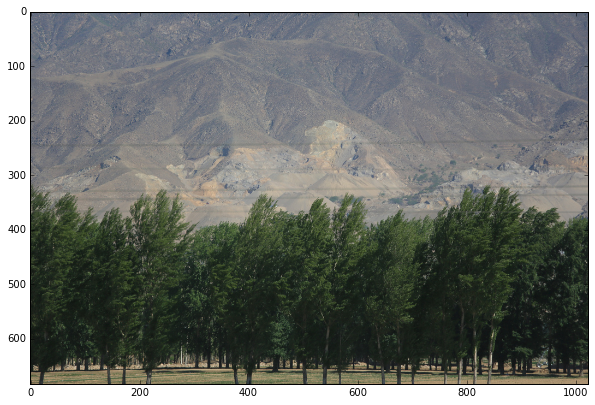

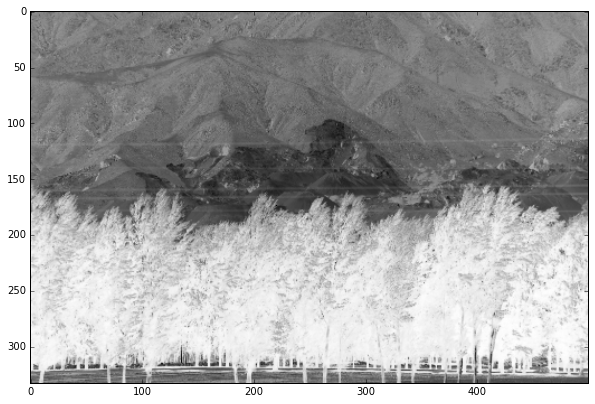

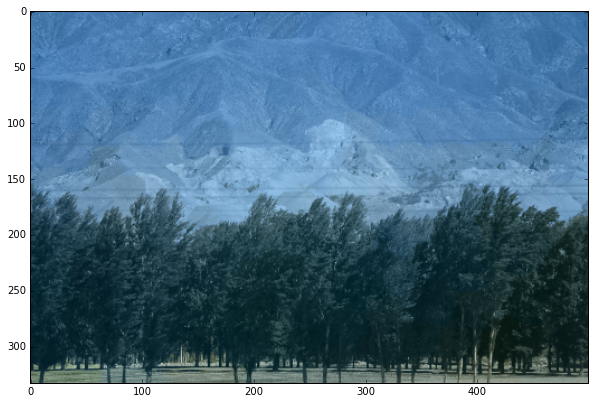

In [15]:
img = imread("Presentation/Images/example2.jpg")
scale_factor = min(IMG_HEIGHT/img.shape[0], IMG_WIDTH/img.shape[1])

plt.figure(figsize=FIGSIZE)
plt.imshow(img)

img_grey = convert(rescale(img, scale_factor))[:,:,0]
segments = get_segments(img_grey)
features = extract_features(img_grey, segments)
second_pred = clamp(clf_second.predict(features), -U_MAX, U_MAX)
third_pred = clamp(clf_third.predict(features), -V_MAX, V_MAX)

plt.figure(figsize=FIGSIZE)
plt.imshow(img_grey, plt.cm.binary)

# Apply MRF to smooth out colorings
mrf_second_pred, mrf_third_pred = apply_mrf(second_pred*2, third_pred*2, segments, features)

# Reconstruct image
img_ = np.zeros((img_grey.shape[0], img_grey.shape[1], 3))
img_[:,:,0] = img_grey
for (i,j), value in np.ndenumerate(segments):
    img_[i][j][1] = mrf_second_pred[value]
    img_[i][j][2] = mrf_third_pred[value]

plt.figure(figsize=FIGSIZE)
plt.imshow(retrieve(img_))

In [16]:
imsave("Presentation/Images/grey2.jpg", img_grey)

/Users/timasemenov/Packages/Python/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [17]:
imsave("Presentation/Images/result2.jpg", retrieve(img_))

/Users/timasemenov/Packages/Python/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


/Users/timasemenov/Packages/Python/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:373: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


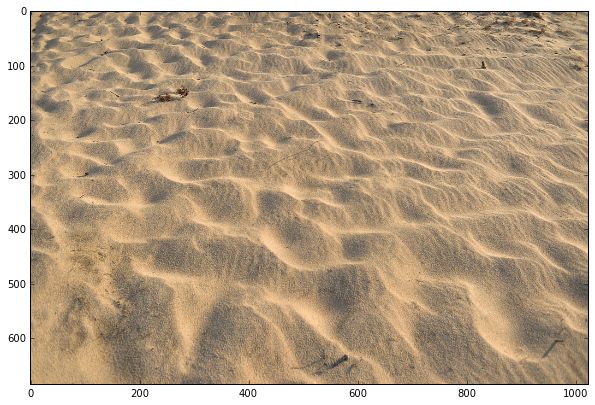

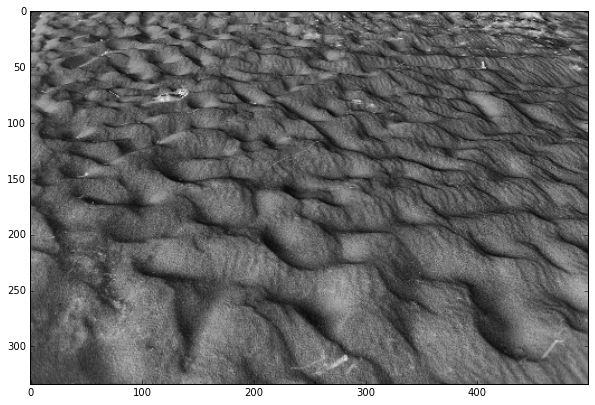

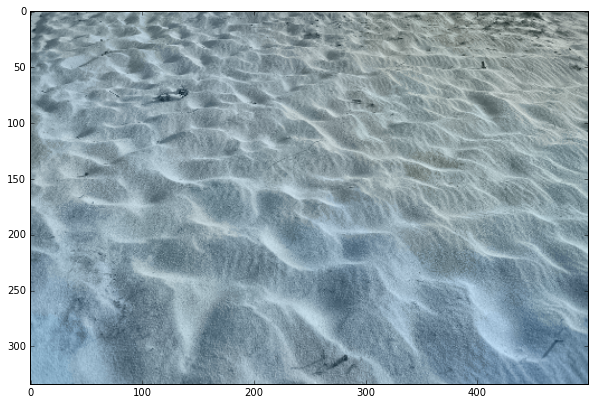

In [95]:
f(test_img_files[2])

In [10]:
test_img_files[4]

'./Images/7202438086_0c213b2ee4_b.jpg'

/Users/timasemenov/Packages/Python/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:373: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


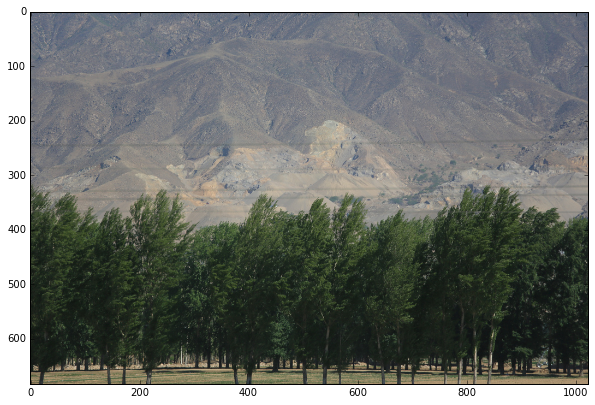

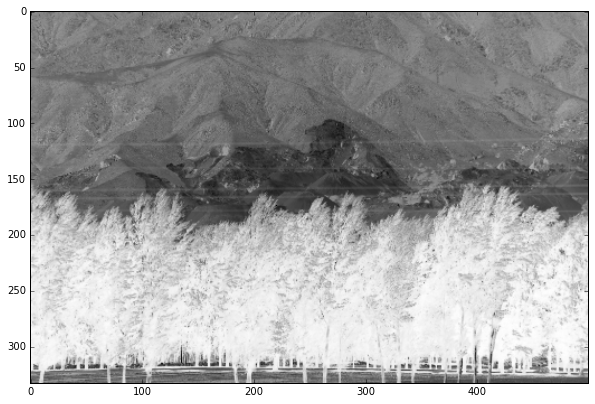

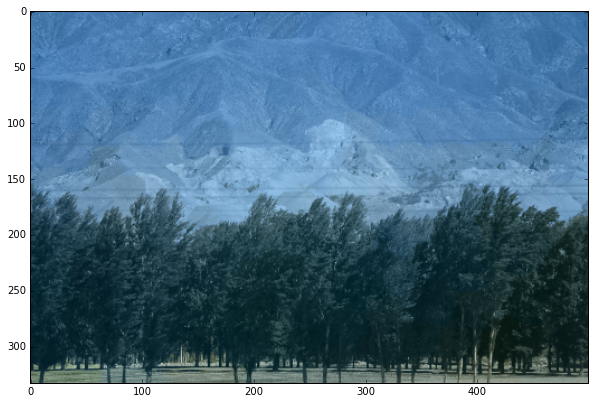

In [96]:
f(test_img_files[4])

In [62]:
def show_img_slic(img_path, show_gray=False):
    img = imread(img_path)
    img_grey = (rgb2grey(img) * 255).astype('uint8')
    img_slic = slic(img_grey, n_segments=200, compactness=0.1, enforce_connectivity=True)
    
    # find the borders between different classes
    img_grid = np.zeros_like(img_slic)
    img_grid[1:,:] = img_slic[:-1,:] - img_slic[1:,:]
    img_grid[:,1:] = img_slic[:,:-1] - img_slic[:,1:]

    img_ = img_grey.copy()
    img_[img_grid != 0] = 0
    
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    
    if show_gray:
        plt.figure(figsize=(20,10))
        plt.imshow(img_grey, plt.cm.binary)
    
    plt.figure(figsize=(20,10))
    plt.imshow(img_, plt.cm.binary)